Use the IRIS dataset and create a decision tree and check the accuracy label.

In [1]:
##Importing all Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
## Importing iris dataset 
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
dir(iris)


['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data.shape

(150, 4)

In [5]:
print(iris.target)
print()
print(iris.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

(150,)


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
# Assigning  the features into one variable and target data into another variable (Slicing )
x=iris.data
y=iris.target
print(x.shape,y.shape)

(150, 4) (150,)


In [8]:
##Importing all imp libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler


Spliting training data and testing

In [9]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=5)


In [10]:
print('\n xtrain:',xtrain.shape)
print('\n xtest:',xtest.shape)
print('\n ytrain:',ytrain.shape)
print('\n ytest:',ytest.shape)


 xtrain: (120, 4)

 xtest: (30, 4)

 ytrain: (120,)

 ytest: (30,)


In [11]:
##Scaling down the features using Standard Scaler 
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [12]:
#feature Scaling
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

Fitting Decision Tree to dataset

In [13]:

#importing decision tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(scaled_xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
##predicting the test result
ypred=classifier.predict(scaled_xtest)
ypred

array([1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [15]:
##creating confusion matrix 
matrix=confusion_matrix(ytest,ypred)
matrix

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  3,  8]], dtype=int64)

In [16]:
##creating Classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.79      1.00      0.88        11
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30



In [17]:
## Checking Accuracy 
print('Accuracy:',accuracy_score(ytest,ypred)*100)

Accuracy: 90.0


[Text(125.55000000000001, 199.32, 'X[3] <= -0.485\nentropy = 1.584\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(83.7, 163.07999999999998, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 0.755\nentropy = 1.0\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(125.55000000000001, 126.83999999999999, 'X[3] <= 0.363\nentropy = 0.371\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(83.7, 90.6, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(167.4, 90.6, 'X[1] <= -1.035\nentropy = 0.75\nsamples = 14\nvalue = [0, 11, 3]'),
 Text(83.7, 54.359999999999985, 'X[0] <= 0.312\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(41.85, 18.119999999999976, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(125.55000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 54.359999999999985, 'X[2] <= 0.992\nentropy = 0.439\nsamples = 11\nvalue = [0, 10, 1]'),
 Text(209.25, 18.119999999999976, 'entropy

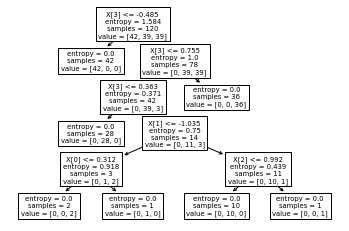

In [18]:
##Creating Decision tree
tree.plot_tree(classifier)

In [19]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= -0.49
|   |--- class: 0
|--- feature_3 >  -0.49
|   |--- feature_3 <= 0.75
|   |   |--- feature_3 <= 0.36
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.36
|   |   |   |--- feature_1 <= -1.04
|   |   |   |   |--- feature_0 <= 0.31
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  0.31
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.04
|   |   |   |   |--- feature_2 <= 0.99
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.99
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  0.75
|   |   |--- class: 2

